# CART models

### Classification Tree
It "asks" a sequence of if-else questions about individual features to infer class labels. It's also able to capture <b>non-linear relationships</b> between features and labels. <br>
<b>Important!</b> Trees don't require <b>feature scaling | normalization</b>. It <b>does</b>, however, require dummy-encoding and missing-values treatment. 

In [16]:
!pip install mlxtend

     |████████████████████████████████| 1.3 MB 36.9 MB/s eta 0:00:01
     |████████████████████████████████| 24.9 MB 70.3 MB/s eta 0:00:01MB/s eta 0:00:01
     |████████████████████████████████| 821 kB 60.8 MB/s eta 0:00:01
     |████████████████████████████████| 15.4 MB 58.1 MB/s eta 0:00:01
     |████████████████████████████████| 28.4 MB 64.3 MB/s eta 0:00:01
     |████████████████████████████████| 303 kB 65.1 MB/s eta 0:00:01
     |████████████████████████████████| 10.3 MB 59.6 MB/s eta 0:00:01
     |████████████████████████████████| 9.7 MB 65.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 33.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 56.0 MB/s eta 0:00:01
     |████████████████████████████████| 227 kB 94.4 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 9.4 MB/s  eta 0:00:01
     |████████████████████████████████| 510 kB 82.4 MB/s eta 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packag

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline 

In [2]:
# import all the datasets 
bike_sharing = pd.read_csv('datasets/bike_sharing.csv')
auto_mpg = pd.read_csv('datasets/auto_mpg.csv')
breast_cancer = pd.read_csv('datasets/breast_cancer.csv')
indian_liver = pd.read_csv('datasets/indian_liver_patient_preprocessed.csv')

In [3]:
# first, let's look at the breast cancer dataset
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
breast_cancer.drop('Unnamed: 32', axis=1, inplace=True)
print(breast_cancer.info())
breast_cancer.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# look at diagnosis distribution
print(breast_cancer.diagnosis.value_counts())
breast_cancer.diagnosis = breast_cancer.diagnosis.astype('category')
breast_cancer.diagnosis = breast_cancer.diagnosis.cat.codes
breast_cancer.diagnosis[:5]

B    357
M    212
Name: diagnosis, dtype: int64


0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int8

In [6]:
# split the data
X, y = breast_cancer.drop('diagnosis', axis=1), breast_cancer['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# instantiate a decision tree classifier
dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(f'DecisionTreeClassifier accuracy: {accuracy_score(y_test, y_pred)}')

# instantiate a decision tree classifier with 'entropy' criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy').fit(X_train, y_train)
y_pred = dt_entropy.predict(X_test)
print(f'DecisionTreeClassifier with enropy criterion accuracy: {accuracy_score(y_test, y_pred)}')

logreg = LogisticRegression().fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(f'LogisticRegression accuracy: {accuracy_score(y_test, y_pred)}')

DecisionTreeClassifier accuracy: 0.9064327485380117
DecisionTreeClassifier with enropy criterion accuracy: 0.9473684210526315
LogisticRegression accuracy: 0.6257309941520468


### Gini vs Entropy
Most of the time, the gini index and entropy lead to the same results. The gini index is slightly faster to compute and is the default criterion used in the DecisionTreeClassifier model of scikit-learn.

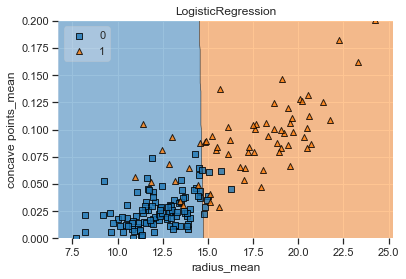

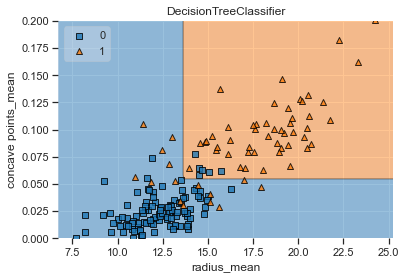

In [7]:
import mlxtend.plotting

def plot_labeled_decision_regions(X_test, y_test, clfs):
    for clf in clfs:

        mlxtend.plotting.plot_decision_regions(np.array(X_test), np.array(y_test), clf=clf, legend=2)
        
        plt.ylim((0,0.2))

        # Adding axes annotations
        plt.xlabel(X_test.columns[0])
        plt.ylabel(X_test.columns[1])
        plt.title(str(clf).split('(')[0])
        plt.show()

        
# 2D visualization on radius_mean & concave points_mean
X_train, X_test, y_train, y_test = train_test_split(breast_cancer[['radius_mean', 'concave points_mean']], y, test_size=.3, stratify=y)
logreg = LogisticRegression().fit(X_train, y_train)
dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
plot_labeled_decision_regions(X_test, y_test, [logreg, dt])

[Text(167.4, 181.2, 'X[1] <= 0.051\ngini = 0.467\nsamples = 398\nvalue = [250, 148]'),
 Text(83.7, 108.72, 'X[0] <= 14.98\ngini = 0.1\nsamples = 245\nvalue = [232, 13]'),
 Text(41.85, 36.23999999999998, 'gini = 0.051\nsamples = 231\nvalue = [225, 6]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 13.62\ngini = 0.208\nsamples = 153\nvalue = [18, 135]'),
 Text(209.25, 36.23999999999998, 'gini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(292.95, 36.23999999999998, 'gini = 0.1\nsamples = 133\nvalue = [7, 126]')]

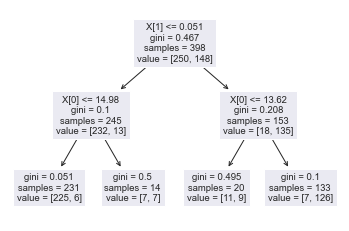

In [8]:
from sklearn.tree import plot_tree
plot_tree(dt)

In [ ]:
pd.read